In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tinystepperdriver import Tinystepperdriver
drv = Tinystepperdriver(1, 2)

In [3]:
print(drv.move(4, 0, 300))
itrs = 0
while drv.iterate():
    itrs += 1
    
print(itrs)

True
484444


In [4]:
last_val = 0
def f(row):
    global last_val
    if last_val == 0:
        val = 0
    else:
        val = row["time"] - last_val
    last_val = row["time"]
    return val

df = pd.read_csv("log_digitalWrite.txt")
df["duration"] = df.apply(f, axis=1)

first_val = 0
def g(row):
    global first_val
    val = 0
    if first_val != 0:
        val = row["time"] - first_val
    else:
        first_val = row["time"]
    return val

df2 = df[df["pin"]!=2].copy()
df2["time_relative"] = df2.apply(g, axis=1)
df2

,time,pin,state,duration,time_relative
1,3560858172,1,1,38,0
2,3560858211,1,0,39,39
3,3560858250,1,1,39,78
4,3560858290,1,0,40,118
5,3560858329,1,1,39,157
6,3560858367,1,0,38,195
7,3560858406,1,1,39,234
8,3560858444,1,0,38,272
9,3560858448,1,0,4,276


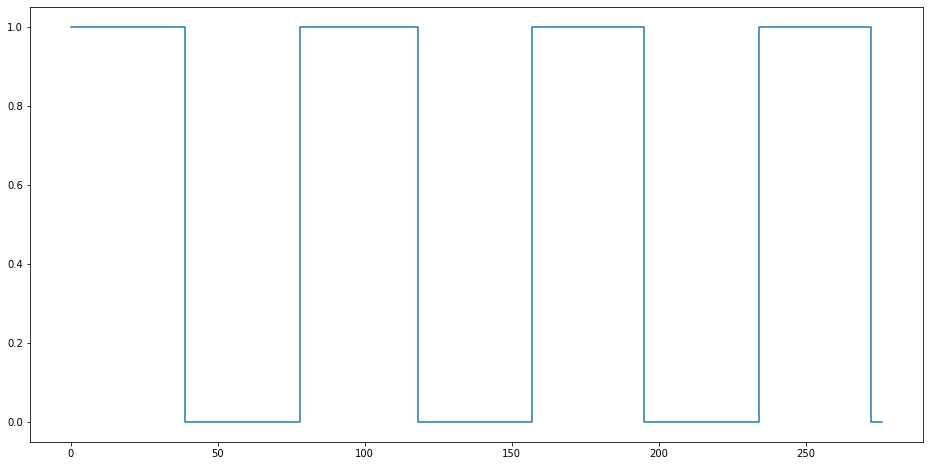

In [5]:
plt.figure(figsize=(16, 8))
plt.step(df2["time_relative"], df2["state"], where="post")

In [6]:
df_gen = pd.read_csv("log_general.txt")
df_gen.columns = ["time", "operation", "steps", "duration", "last_step_time", "time_since_step", "wanted_duration"]
df_gen

,time,operation,steps,duration,last_step_time,time_since_step,wanted_duration
0,3560858173,iterate,7,262477,330285081,37523,37500
1,3560858212,iterate,6,224523,330324055,37954,37496
2,3560858252,iterate,5,186574,330364020,37949,37420
3,3560858291,iterate,4,148585,330403515,37989,37314
4,3560858330,iterate,3,111027,330442070,37558,37146
5,3560858369,iterate,2,73513,330481086,37514,37009
6,3560858408,iterate,1,36035,330520109,37478,36756
7,3560858445,iterate,0,0,330557555,36447,36035


In [7]:
df_gen["wanted_duration"].sum()/1000

296.676